Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.6 kB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.
Finding shortest path from A to G...
Shortest path: A -> C -> D -> F -> G
Total distance: 13


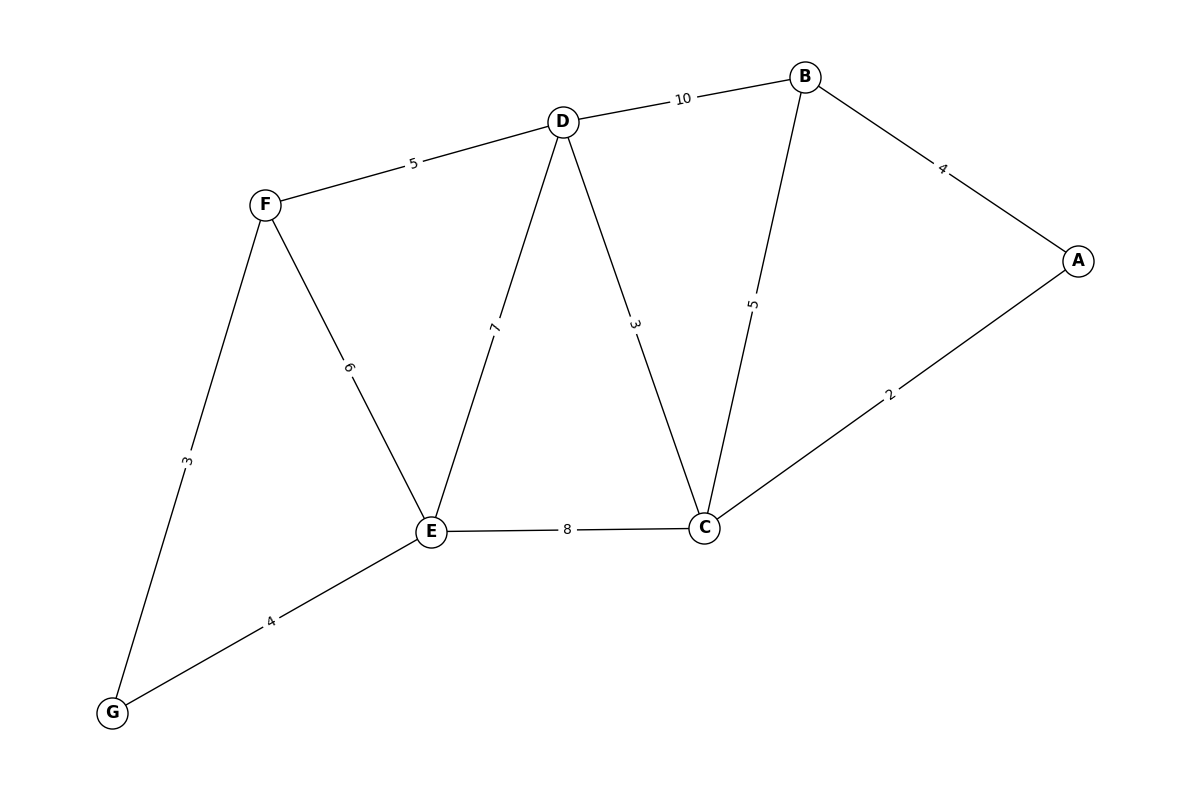

In [2]:
%pip install networkx

import heapq
import networkx as nx
from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt

def dijkstra(graph, start, end):
  """
  Implementation of Dijkstra's algorithm to find the shortest path from start to end.
  Returns the shortest path and all nodes visited during the algorithm execution.
  """
  # Priority queue to store vertices that need to be processed
  priority_queue = [(0, start, [])]  # (distance, vertex, path)
  # Set to keep track of visited vertices
  visited = set()
  # Keep track of the nodes visited in order for visualization
  visited_order = []
  
  while priority_queue:
    # Get the vertex with the minimum distance
    current_distance, current_vertex, path = heapq.heappop(priority_queue)
    
    # If we've already processed this vertex, skip it
    if current_vertex in visited:
      continue
    
    # Add the current vertex to the visited set and record the order
    visited.add(current_vertex)
    visited_order.append(current_vertex)
    
    # Update the path to include the current vertex
    current_path = path + [current_vertex]
    
    # If we've reached the end vertex, return the path and visited order
    if current_vertex == end:
      return current_path, visited_order
    
    # Check all neighbors of the current vertex
    for neighbor, weight in graph[current_vertex].items():
      if neighbor not in visited:
        # Calculate new distance and add to the priority queue
        distance = current_distance + weight
        heapq.heappush(priority_queue, (distance, neighbor, current_path))
  
  # If no path is found
  return None, visited_order

def create_sample_graph():
  """Create a sample graph for demonstration."""
  graph = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 5, 'D': 10},
    'C': {'A': 2, 'B': 5, 'D': 3, 'E': 8},
    'D': {'B': 10, 'C': 3, 'E': 7, 'F': 5},
    'E': {'C': 8, 'D': 7, 'F': 6, 'G': 4},
    'F': {'D': 5, 'E': 6, 'G': 3},
    'G': {'E': 4, 'F': 3}
  }
  return graph

def visualize_dijkstra(graph, start, end):
  """Visualize Dijkstra's algorithm execution."""
  # Convert to NetworkX graph for visualization
  G = nx.Graph()
  
  # Add edges with weights
  for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
      G.add_edge(node, neighbor, weight=weight)
  
  # Get node positions for visualization
  pos = nx.spring_layout(G, seed=42)
  
  # Calculate path using Dijkstra's algorithm
  shortest_path, visited_order = dijkstra(graph, start, end)
  
  # Create figure and axis
  fig, ax = plt.subplots(figsize=(12, 8))
  
  # Edge labels
  edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
  
  # Initial state: all nodes are white
  nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors='black', node_size=500, ax=ax)
  nx.draw_networkx_edges(G, pos, width=1, ax=ax)
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
  nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
  
  # Title with current step info
  title = ax.text(0.5, 1.05, "", transform=ax.transAxes, ha="center", fontsize=15)
  
  def update(i):
    ax.clear()
    
    # Nodes visited so far
    visited_nodes = visited_order[:i+1]
    unvisited_nodes = [n for n in G.nodes() if n not in visited_nodes]
    
    # Current path being explored
    if i < len(visited_order):
      current_path = []
      for j in range(len(shortest_path)):
        if shortest_path[j] in visited_nodes:
          current_path.append(shortest_path[j])
    else:
      current_path = shortest_path
    
    # Draw visited nodes in green
    if visited_nodes:
      nx.draw_networkx_nodes(G, pos, nodelist=visited_nodes, node_color='lightgreen', 
                  edgecolors='black', node_size=500, ax=ax)
    
    # Draw unvisited nodes in white
    if unvisited_nodes:
      nx.draw_networkx_nodes(G, pos, nodelist=unvisited_nodes, node_color='white',
                  edgecolors='black', node_size=500, ax=ax)
    
    # Highlight current node being processed in red
    if i < len(visited_order):
      nx.draw_networkx_nodes(G, pos, nodelist=[visited_order[i]], node_color='red',
                  edgecolors='black', node_size=500, ax=ax)
    
    # Highlight path edges
    path_edges = [(current_path[j], current_path[j+1]) for j in range(len(current_path)-1)]
    nx.draw_networkx_edges(G, pos, width=1, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color='red', ax=ax)
    
    # Draw labels and edge weights
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    
    # Update title
    if i < len(visited_order):
      title_text = f"Step {i+1}: Visiting node {visited_order[i]}"
    else:
      if shortest_path:
        title_text = f"Final path: {' -> '.join(shortest_path)}"
      else:
        title_text = "No path found"
        
    ax.set_title(title_text, fontsize=15)
    ax.axis('off')
    
  # Create animation
  frames = len(visited_order) + 5  # Add extra frames to show final path
  ani = FuncAnimation(fig, update, frames=frames, interval=1000, repeat=True)
  
  plt.tight_layout()
  plt.axis('off')
  
  return ani

# Create and demonstrate Dijkstra's algorithm
graph = create_sample_graph()
start_node = 'A'
end_node = 'G'

print(f"Finding shortest path from {start_node} to {end_node}...")
shortest_path, _ = dijkstra(graph, start_node, end_node)

if shortest_path:
  print(f"Shortest path: {' -> '.join(shortest_path)}")
  
  # Calculate total distance
  total_distance = 0
  for i in range(len(shortest_path) - 1):
    total_distance += graph[shortest_path[i]][shortest_path[i+1]]
  print(f"Total distance: {total_distance}")
else:
  print(f"No path found from {start_node} to {end_node}")

# Visualize algorithm
animation = visualize_dijkstra(graph, start_node, end_node)
plt.show()